## [Martingales in Quantitative Finance](https://wire.insiderfinance.io/martingales-in-quantitative-finance-2edba81c22a5)

> Exploring conditional expectation, measure change, and the math behind no-arbitrage

> A martingale is the structure behind modern asset pricing.

In [1]:
!pip install -q numpy pandas matplotlib seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

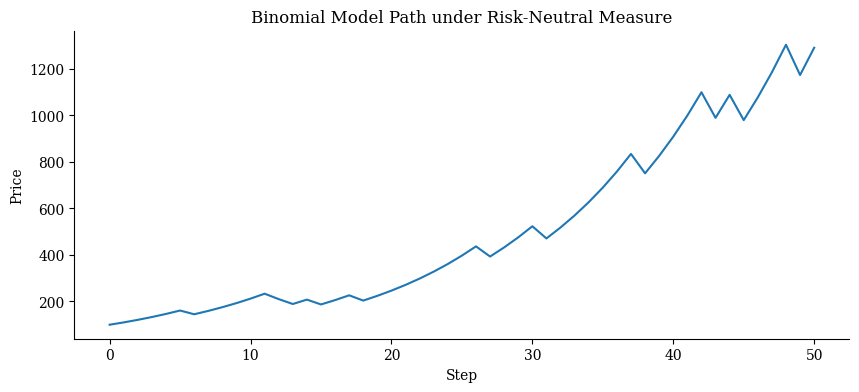

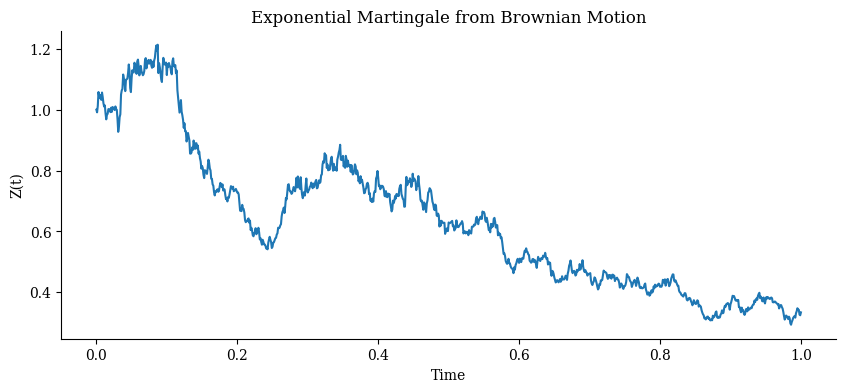

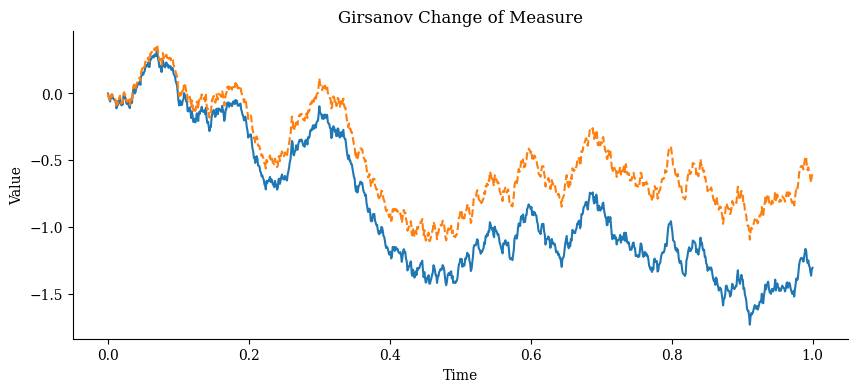

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    "axes.spines.top": False,
    "axes.spines.right": False
})

# Binomial Model with risk-neutral probabilities
def simulate_binomial_tree(S0, u, d, r, steps):
    q = (1 + r - d) / (u - d)
    paths = [S0]
    for _ in range(steps):
        move = np.random.choice([u, d], p=[q, 1 - q])
        paths.append(paths[-1] * move)
    return paths

# Brownian Motion and exponential martingale
def simulate_exponential_martingale(theta, T, steps):
    dt = T / steps
    W = np.cumsum(np.random.normal(0, np.sqrt(dt), size=steps))
    W = np.insert(W, 0, 0)
    t = np.linspace(0, T, steps + 1)
    Z = np.exp(-theta * W - 0.5 * theta**2 * t)
    return t, W, Z

# Girsanov: original and shifted Brownian motion
def simulate_girsanov(theta, T, steps):
    dt = T / steps
    W = np.cumsum(np.random.normal(0, np.sqrt(dt), size=steps))
    W = np.insert(W, 0, 0)
    t = np.linspace(0, T, steps + 1)
    W_tilde = W + theta * t
    return t, W, W_tilde

# Plotting the binomial model path
binomial_path = simulate_binomial_tree(S0=100, u=1.1, d=0.9, r=0.05, steps=50)

plt.figure(figsize=(10, 4))
plt.plot(binomial_path, label="Binomial Tree Path (Risk-Neutral)")
plt.title("Binomial Model Path under Risk-Neutral Measure")
plt.xlabel("Step")
plt.ylabel("Price")
## plt.savefig("binomial_path.png")
plt.show()

# Plot exponential martingale
t, W, Z = simulate_exponential_martingale(theta=0.7, T=1, steps=1000)

plt.figure(figsize=(10, 4))
plt.plot(t, Z, label="Exponential Martingale")
plt.title("Exponential Martingale from Brownian Motion")
plt.xlabel("Time")
plt.ylabel("Z(t)")
## plt.savefig("exponential_martingale.png")
plt.show()

# Plot Girsanov transformation
t, W, W_tilde = simulate_girsanov(theta=0.7, T=1, steps=1000)

plt.figure(figsize=(10, 4))
plt.plot(t, W, label="Original Brownian Motion")
plt.plot(t, W_tilde, label="Shifted (Girsanov)", linestyle='--')
plt.title("Girsanov Change of Measure")
plt.xlabel("Time")
plt.ylabel("Value")
## plt.savefig("girsanov_shift.png")
plt.show()